# Cost-Benefit Analysis
使用 python 對 Social_Network_Ads.csv 進⾏ naive bayes 分析，過
程中對所有重要程式步驟進行截圖並加以說明，越詳盡越好：

- (d) 設test_size = 0.33，random_state = 1，進⾏ naive bayes 分析後，列出準確率及TP Rate/FP Rate (10%)
- (e) 繪出 ROC Curve 並計算出 AUC (20%)
- (f) 繪出 lift chart (又稱Cumulative Gain Chart) (X軸: sample size rate; Y軸: TP rate) (10%)
- (g) 繪出 lift curve (X軸: sample size rate; Y軸: Lift) (10%)

In [1]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Map string to int
[(筆記) pandas的map、apply、applymap](https://home.gamer.com.tw/creationDetail.php?sn=4219422)

In [2]:
gender_mapping = {'Male': 1, 'Female': 0}
ser_map = df['Gender'].map(gender_mapping)
df['Gender'] = ser_map

df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [3]:
features = df[['Gender', 'Age', 'EstimatedSalary']]
label = df['Purchased']
print('Total records:', len(df))

Total records: 400


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=1)

print('Train Set Size:', len(X_train))
print('Test Set Size:', len(X_test))

Train Set Size: 268
Test Set Size: 132


In [5]:
#Import Gaussian Naive Bayes 模型 (高斯樸素貝氏)
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Training Precision

In [6]:
model.score(X_train, y_train)

0.8955223880597015

In [7]:
from sklearn import metrics

y_train_predict = model.predict(X_train)
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       176
           1       0.89      0.79      0.84        92

    accuracy                           0.90       268
   macro avg       0.89      0.87      0.88       268
weighted avg       0.90      0.90      0.89       268



### Testing Precision

In [8]:
model.score(X_test, y_test)

0.8333333333333334

In [9]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        81
           1       0.78      0.78      0.78        51

    accuracy                           0.83       132
   macro avg       0.82      0.82      0.82       132
weighted avg       0.83      0.83      0.83       132



### Confusion matrix & TP/FP rate of Testing

In [25]:
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

[[70 11]
 [11 40]]


In [26]:
tp = cm[0, 0]
fp = cm[1, 0]
tn = cm[1, 1]
fn = cm[0, 1]
tp_rate = tp/(tp+fn)
fp_rate = fp/(fp+tn)
print("TP rate:", tp_rate)
print("FP rate:", fp_rate)

TP rate: 0.8641975308641975
FP rate: 0.21568627450980393


## ROC Curve
繪出 ROC Curve 並計算出 AUC = `0.82` (可是圖上寫`0.92`)
* [Receiver Operating Characteristic (ROC)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* [Metrics Module (API Reference) 所有的圖都在這兒](https://scikit-plot.readthedocs.io/en/stable/metrics.html)

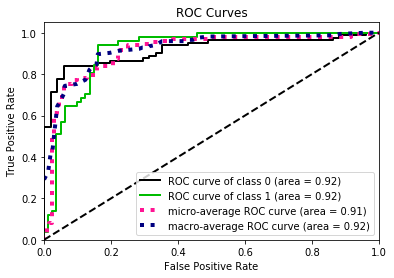

In [22]:
import scikitplot as skplt

y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [21]:
sklearn.metrics.roc_auc_score(y_test, predicted)

0.8242556281771968

## Lift Chart
繪出 lift chart (又稱Cumulative Gain Chart) 
* X軸: sample size rate
* Y軸: TP rate

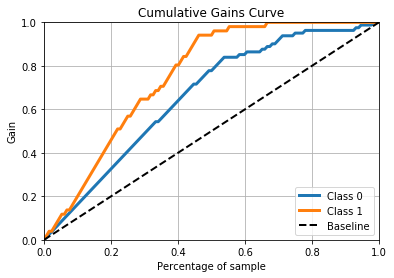

In [12]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

## Lift Curve
繪出 lift curve 
* X軸: sample size rate
* Y軸: Lift

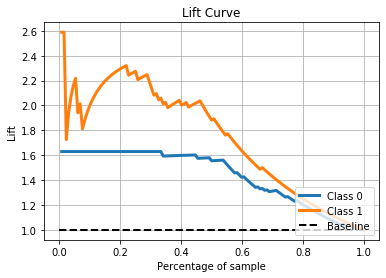

In [13]:
skplt.metrics.plot_lift_curve(y_test, y_probas)